<a href="https://colab.research.google.com/github/rahulrajbo/Supervised-Model/blob/main/Orthopedic_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning Model Project**

**By- Rahul Bora**

# **DOMAIN: Healthcare**

**CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions.University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

**DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.


*   pelvic_incidence
*   pelvic_tilt numeric
*   lumbar_lordosis_angle
*   sacral_slope
*   pelvic_radius
*   degree_spondylolisthesis
*   class

# **DataSet Link:**     https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients?select=column_3C_weka.csv

# **Import Libraries**

In [ ]:
#Import important libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import plotly
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# **Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Supervised Model/column_3C_weka.csv')

In [ ]:
print(data.shape)

(310, 7)


In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [ ]:
data['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [ ]:
data.shape[0]

310

In [ ]:
((data['class'].value_counts())/data.shape[0])*100

Spondylolisthesis    48.387097
Normal               32.258065
Hernia               19.354839
Name: class, dtype: float64

We see here that the distribution across the classes are unbalanced but we still have a decent representation of all the three classes in the data. Spondylolisthesis is maximum with 48% followed by Normal that is 32% and Hernia is minimum with 19%. We may need to use class balancing methods such as oversampling, undersampling or class weights in case the algorithms fails to perform on the current class distribution.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data.isnull().any()

pelvic_incidence            False
pelvic_tilt                 False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
dtype: bool

We see here that there are no NULL values in the dataset. Class is a categorical column and should have a catagorical data type instead of object. All features are numerical and hence float64 data type is fine for these feature variables.

In [ ]:
data.rename(columns = {'class':'Class'}, inplace = True)

In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [ ]:
data['Class'] = data.Class.astype('category')

In [ ]:
data.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
Class                       category
dtype: object

So now we have a categorical target variable called Class and 6 float64 feature variables in the data

In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
data.Class.value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: Class, dtype: int64

The above gives a summary of all features and distribution of the classes.

**Univariate, Bivariate, and Multivariate Analysis**

For numerical variables we can see the distribution plots for each separately as a part of Univariate analysis. However, here we will see box plots for each feature variables separately for the classes. This will give us an idea of how the distributions vary between the classes.

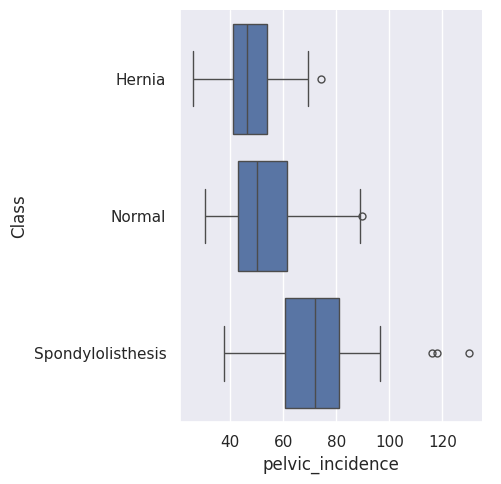

In [ ]:
sns.catplot(x="pelvic_incidence", y = "Class", data=data, kind="box");

Here we noticed that the box plot (5 point summary) of Pelvic_incidence are quite different for the 3 classes. Spondylolisthesis can be easily separable using this feature but there are some overlaps between the Normal and Hernia classes. We also notice some outliers in the data however KNN will not be affected by outliers.

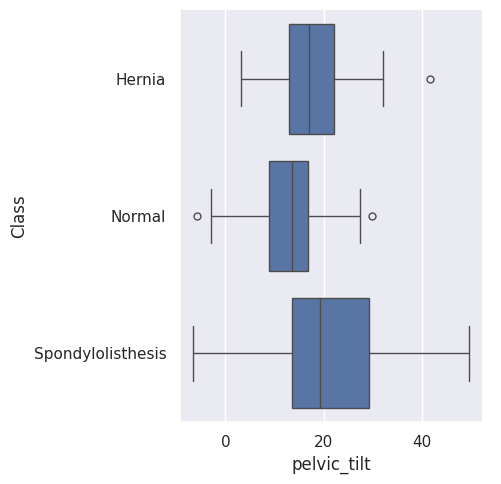

In [ ]:
sns.catplot(x="pelvic_tilt", y = "Class", data=data, kind="box");

Pelvic_tilt has some overlap for the classes but still have separability power as evident from the IQR difference. Similarly we will see the boxplot for all features for the three classes.

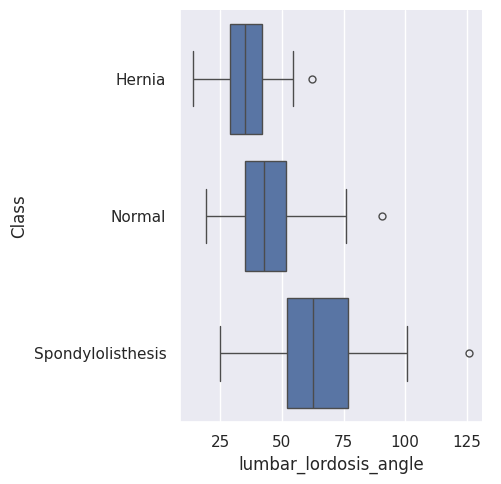

In [ ]:
sns.catplot(x="lumbar_lordosis_angle", y = "Class", data=data, kind="box");

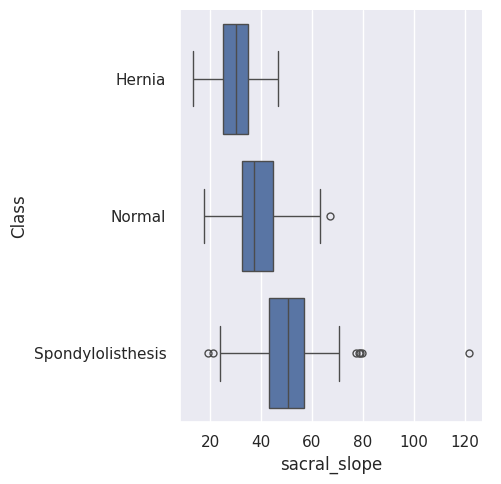

In [ ]:
sns.catplot(x="sacral_slope", y = "Class", data=data, kind="box");

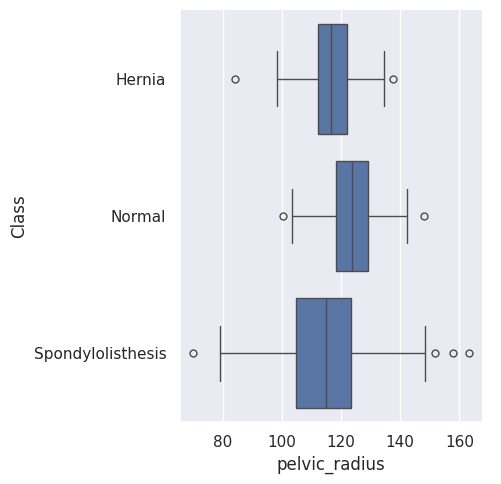

In [ ]:
sns.catplot(x="pelvic_radius", y = "Class", data=data, kind="box");

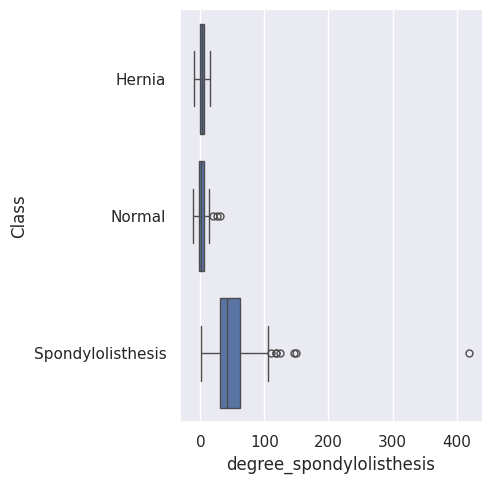

In [ ]:
sns.catplot(x="degree_spondylolisthesis", y = "Class", data=data, kind="box");

The plot for degree_spondylolisthesis indicates very little difference between Normal and Hernia however Spondylolisthesis has a very difference distribution.

In general we noticed that the separability is quite decent between the three classes using the given feature space.

**A pairplot to understand the separation using two features at a time**

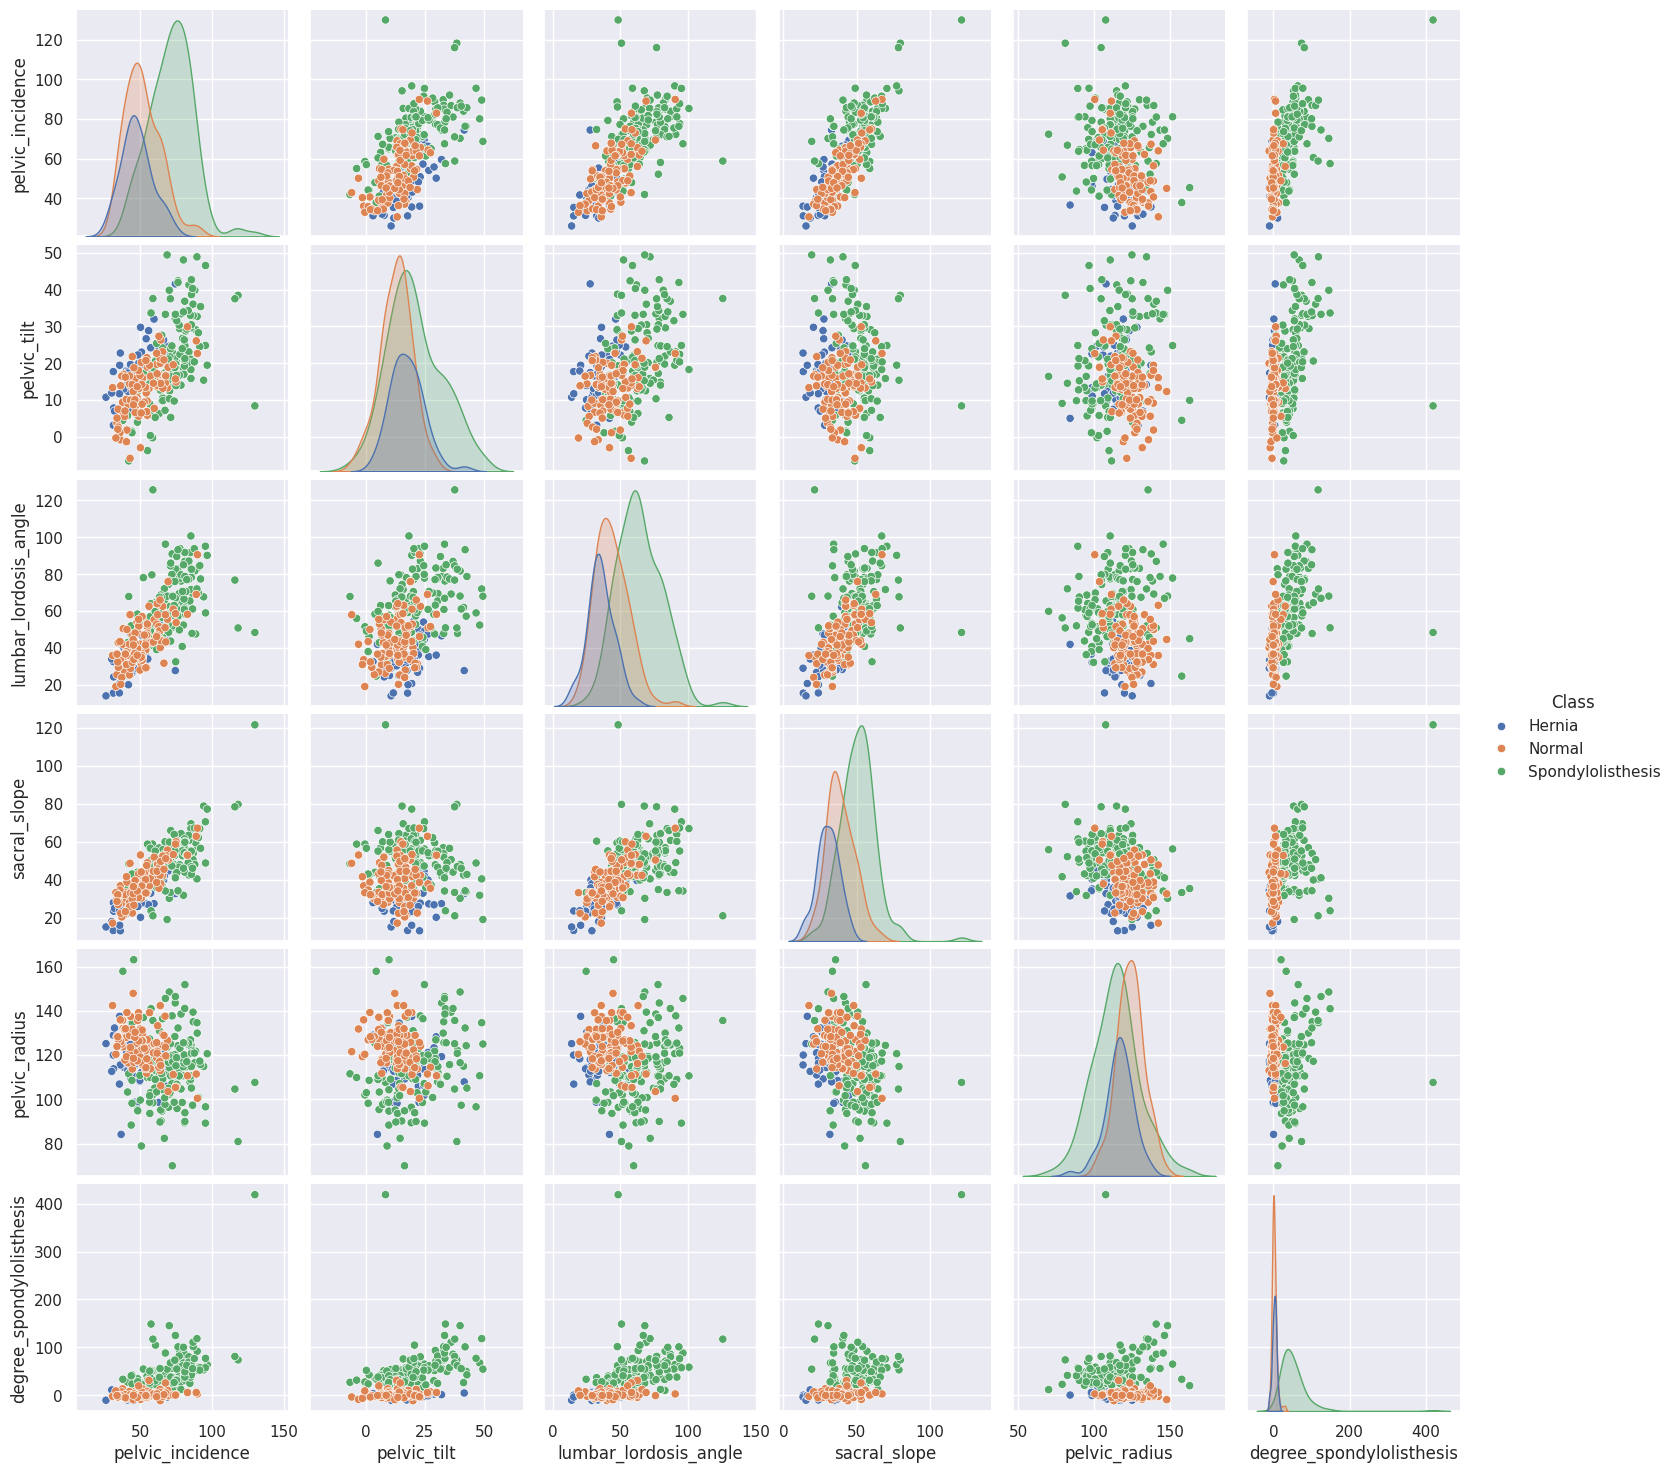

In [ ]:
sns.pairplot(data = data, hue = 'Class');

As also evident from the earlier boxplot analysis it will be slightly difficult to separate Blue (Normal) and Red (Hernia) as we see quite a few overlaps between then in most of the pairplots. However, Green (Spondylolisthesis) is quite different from the rest of the two.

We have already checked for target balancing earlier. The data is slightly unbalanced between the three classes but still have a decent representation for all classes.

In [ ]:
((data['Class'].value_counts())/data.shape[0])*100

Spondylolisthesis    48.387097
Normal               32.258065
Hernia               19.354839
Name: Class, dtype: float64

# **Train and Test Data**

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes and target variable
x = data.drop(labels= "Class" , axis = 1)
y = data["Class"]
x.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [ ]:
y.head()

0    Hernia
1    Hernia
2    Hernia
3    Hernia
4    Hernia
Name: Class, dtype: category
Categories (3, object): ['Hernia', 'Normal', 'Spondylolisthesis']

In [ ]:
#Normalization to nullify the effect of units in the feature variables
x_scaled = x.apply(zscore)
x_scaled.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [ ]:
x_scaled.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-9.168293e-17,1.833659e-16,1.375244e-16,-1.031433e-16,4.354939e-16,1.833659e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


Now we see that all feature variables has a mean close to 0 and standard deviation close to 1

In [ ]:
# Split x and y into training and test set in 75:25 ratio

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=10)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(217, 6) (93, 6) (217,) (93,)


In [ ]:
y_test.value_counts()

Spondylolisthesis    49
Normal               28
Hernia               16
Name: Class, dtype: int64

# **KNN Classifier**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN.fit(x_train, y_train)
predicted_labels = KNN.predict(x_test)
KNN.score(x_test, y_test)

0.8172043010752689

With an arbitrary select K value of 5 we are getting an accuracy of 81% which is quite good. We will try to get a better K values using a simple plot of accuracies over a range of K values.

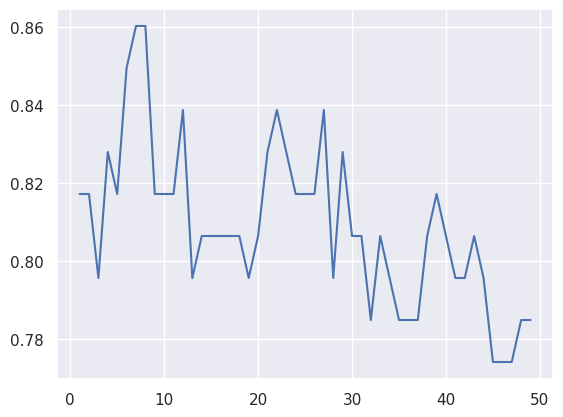

In [ ]:
scores =[]
r = range(1,50)
for k in r:
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN.fit(x_train, y_train)
    scores.append(KNN.score(x_test, y_test))
plt.plot(range(1,50),scores);

Thus we see clear peaks of accuracy at 2 different K values

In [ ]:
k_range = pd.concat([pd.Series(r),pd.Series(scores)], axis = 1 , sort = True)
k_range.columns = ['k', 'accuracy']
k_range.head()

,k,accuracy
0,1,0.817204
1,2,0.817204
2,3,0.795699
3,4,0.827957
4,5,0.817204


In [ ]:
print('Optimal K = {}'.format(k_range.loc[k_range['accuracy'].idxmax(),'k']))

Optimal K = 7


Using the best value of K to finalize the KNN classifier model

In [ ]:
KNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
KNN.fit(x_train, y_train)
predicted_labels = KNN.predict(x_test)
print(KNN.score(x_train, y_train))
print(KNN.score(x_test, y_test))

1.0
0.8602150537634409


We need a significant improvement over the last accuracy value of 81% that we got using K=5

In [ ]:
predicted_labels[0:11]

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Normal', 'Hernia', 'Hernia', 'Normal', 'Normal', 'Hernia',
       'Spondylolisthesis'], dtype=object)

Confusion Matrix


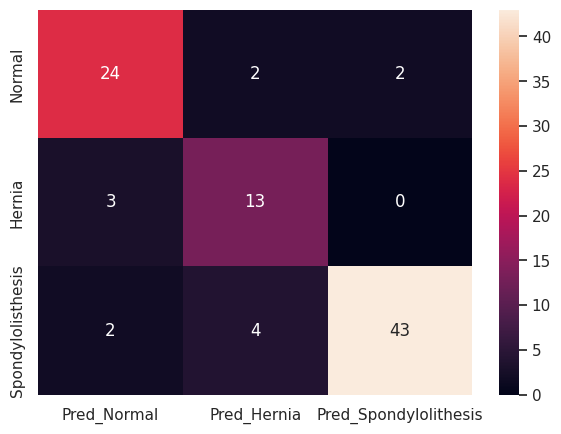

In [ ]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Hernia", "Spondylolisthesis"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Hernia", "Spondylolisthesis"]],
                  columns = [i for i in ["Pred_Normal", "Pred_Hernia", "Pred_Spondylolithesis"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

From the above confusion matrix we observe that there are 6 case where the model has classified a person as normal when actually 2 of them is of Spondylolisthesis and 3 from Hernia. This can be a cause of concern. Also there are few false positives where we see that 2 normal persons has been classified as Hernia.Although we do not have enough information on the meaning of Spondylolisthesis and Hernia to deduce which misclassification is more serious. Although we can make a general observation that classifying a person who is not normal as normal may have serious consequences and in such cases we might need to use alternative metrics such as recall and precision to fine tune our models than just accuracy.

In [ ]:
print('Recall = ', sklearn.metrics.recall_score(y_test,predicted_labels, average = 'weighted'))
print('Precision = ', sklearn.metrics.precision_score(y_test,predicted_labels, average = 'weighted'))

Recall =  0.8602150537634409
Precision =  0.8703441337244979


So recall indicates out of the total TP how many are correclty predicted. 86% recall is generally considered good but this interpretation sometimes can change in medical context and we we may aim for higher recall. Precision is the precision of prediction that is out of the predicted TP how many are correct. 87% precision is quite good.

So we have our final model with 86% accuracy , 86 % recall, and 87% precision


# **Logistic Regression**

In [ ]:
# Fit the model on train data
logic = LogisticRegression(solver = 'liblinear')
logic.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Predict on test data
predicted_labels = logic.predict(x_test)
coef_data = pd.DataFrame(logic.coef_)
coef_data['intercept'] = logic.intercept_
print(coef_data)

          0         1         2         3         4         5  intercept
0 -0.371955  0.879369 -0.608253 -1.133287 -0.998762 -1.687843  -2.627363
1  0.094696 -0.690629  0.082075  0.636535  0.998297 -3.268552  -1.740553
2  0.367421 -0.225167  0.262512  0.639688 -0.151537  4.453223   0.606347


In [ ]:
# model score
model_score = logic.score(x_test, y_test)
print(model_score)

0.8709677419354839


In [ ]:
predicted_labels[0:11]

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Normal', 'Hernia', 'Hernia', 'Normal', 'Spondylolisthesis',
       'Hernia', 'Normal'], dtype=object)

Confusion Matrix


<Axes: >

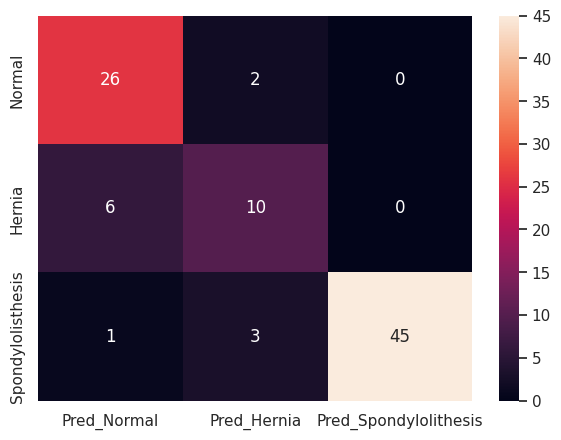

In [ ]:
# confusion matrix
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, predicted_labels,  labels = ["Normal", "Hernia", "Spondylolisthesis"])
data_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Hernia", "Spondylolisthesis"]], columns = [i for i in ["Pred_Normal", "Pred_Hernia", "Pred_Spondylolithesis"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot = True)

# **Decision Tree**

In [ ]:
# Fit the model on training data with splitting criteria = Gini
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
predicted_labels = dtree.predict(x_test)

In [ ]:
# Find the score
print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))

1.0
0.7956989247311828


In [ ]:
# Find Features Importance
print(pd.DataFrame(dtree.feature_importances_, columns = ['Imp'], index = x_train.columns))

                               Imp
pelvic_incidence          0.029159
pelvic_tilt               0.036197
lumbar_lordosis_angle     0.041845
sacral_slope              0.112808
pelvic_radius             0.119143
degree_spondylolisthesis  0.660848


In [ ]:
predicted_labels[0:11]

array(['Normal', 'Normal', 'Spondylolisthesis', 'Normal', 'Hernia',
       'Normal', 'Normal', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal'], dtype=object)

Confusion Matrix


<Axes: >

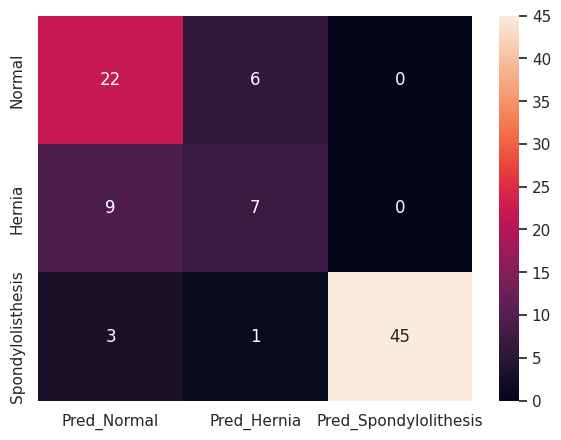

In [ ]:
# confusion matrix
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, predicted_labels,  labels = ["Normal", "Hernia", "Spondylolisthesis"])
data_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Hernia", "Spondylolisthesis"]], columns = [i for i in ["Pred_Normal", "Pred_Hernia", "Pred_Spondylolithesis"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot = True)

# **Bagging**

In [ ]:
# Fit model on training data with dtree as estimator
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
bag = BaggingClassifier(base_estimator = dtree, n_estimators = 50, random_state = 1)
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [ ]:
predicted_labels = bag.predict(x_test)

In [ ]:
# Find the score
print(bag.score(x_train, y_train))
print(bag.score(x_test, y_test))

1.0
0.8709677419354839


In [ ]:
predicted_labels[0:11]

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Hernia', 'Hernia', 'Hernia', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal'], dtype=object)

Confusion Matrix


<Axes: >

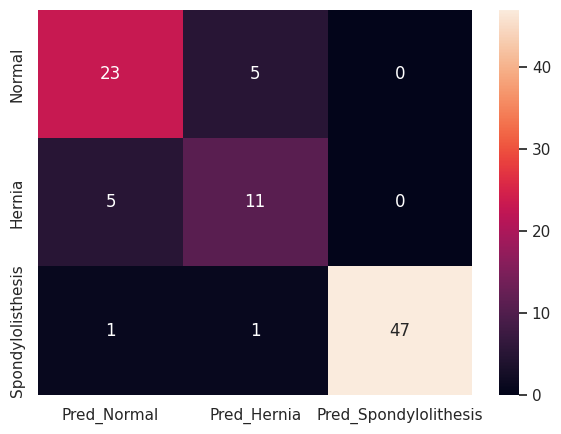

In [ ]:
# confusion matrix
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, predicted_labels,  labels = ["Normal", "Hernia", "Spondylolisthesis"])
data_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Hernia", "Spondylolisthesis"]], columns = [i for i in ["Pred_Normal", "Pred_Hernia", "Pred_Spondylolithesis"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot = True)

# **Random Forest**

In [ ]:
# Fit model on training data
random = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 3)
random.fit(x_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=50, random_state=1)

In [ ]:
predicted_labels = random.predict(x_test)

In [ ]:
# Find the score
print(random.score(x_train, y_train))
print(random.score(x_test, y_test))

1.0
0.8817204301075269


In [ ]:
# Find Features Importance
print(pd.DataFrame(random.feature_importances_, columns = ['Imp'], index = x_train.columns))

                               Imp
pelvic_incidence          0.094564
pelvic_tilt               0.086743
lumbar_lordosis_angle     0.109817
sacral_slope              0.109845
pelvic_radius             0.134828
degree_spondylolisthesis  0.464203


In [ ]:
predicted_labels[0:11]

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Normal', 'Hernia', 'Hernia', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal'], dtype=object)

Confusion Matrix


<Axes: >

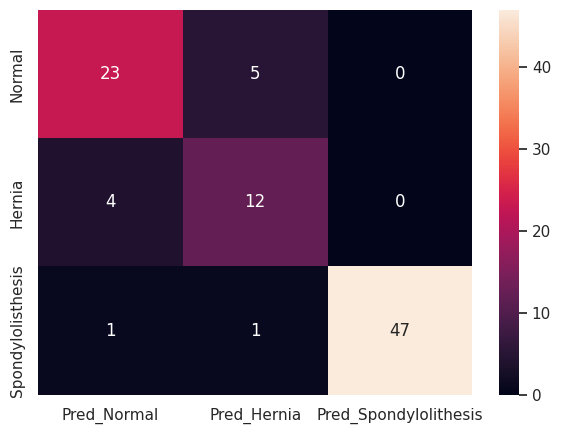

In [ ]:
# confusion matrix
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, predicted_labels,  labels = ["Normal", "Hernia", "Spondylolisthesis"])
data_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Hernia", "Spondylolisthesis"]], columns = [i for i in ["Pred_Normal", "Pred_Hernia", "Pred_Spondylolithesis"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot = True)

# **Ada Boosting**

In [ ]:
# Fit model on training data
ab = AdaBoostClassifier(n_estimators = 10, random_state = 1)
ab.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [ ]:
predicted_labels = ab.predict(x_test)

In [ ]:
# Find the score
print(ab.score(x_train, y_train))
print(ab.score(x_test, y_test))

0.6082949308755761
0.5698924731182796


In [ ]:
# Find Features Importance
print(pd.DataFrame(ab.feature_importances_, columns = ['Imp'], index = x_train.columns))

                          Imp
pelvic_incidence          0.1
pelvic_tilt               0.0
lumbar_lordosis_angle     0.0
sacral_slope              0.4
pelvic_radius             0.0
degree_spondylolisthesis  0.5


In [ ]:
predicted_labels[0:11]

array(['Spondylolisthesis', 'Hernia', 'Spondylolisthesis', 'Hernia',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Normal', 'Normal',
       'Normal'], dtype=object)

Confusion Matrix


<Axes: >

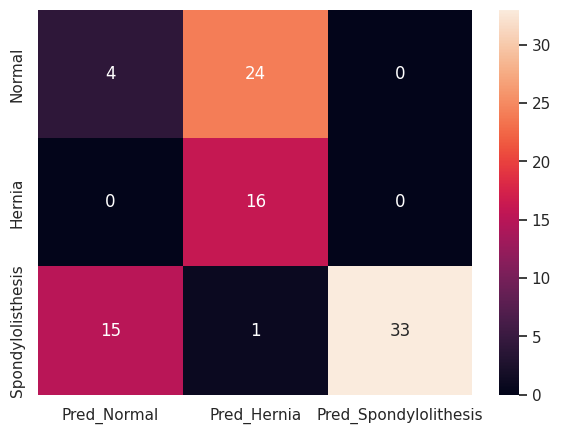

In [ ]:
# confusion matrix
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, predicted_labels,  labels = ["Normal", "Hernia", "Spondylolisthesis"])
data_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Hernia", "Spondylolisthesis"]], columns = [i for i in ["Pred_Normal", "Pred_Hernia", "Pred_Spondylolithesis"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot = True)

# **Gradient Boosting**

In [ ]:
# Fit model on training data
grad = GradientBoostingClassifier(n_estimators = 50, random_state = 1)
grad.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [ ]:
predicted_labels = grad.predict(x_test)

In [ ]:
# Find the score
print(grad.score(x_train, y_train))
print(grad.score(x_test, y_test))

1.0
0.8817204301075269


In [ ]:
# Find Features Importance
print(pd.DataFrame(grad.feature_importances_, columns = ['Imp'], index = x_train.columns))

                               Imp
pelvic_incidence          0.025207
pelvic_tilt               0.059782
lumbar_lordosis_angle     0.028315
sacral_slope              0.136541
pelvic_radius             0.120375
degree_spondylolisthesis  0.629779


In [ ]:
predicted_labels[0:11]

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Hernia', 'Hernia', 'Hernia', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal'], dtype=object)

Confusion Matrix


<Axes: >

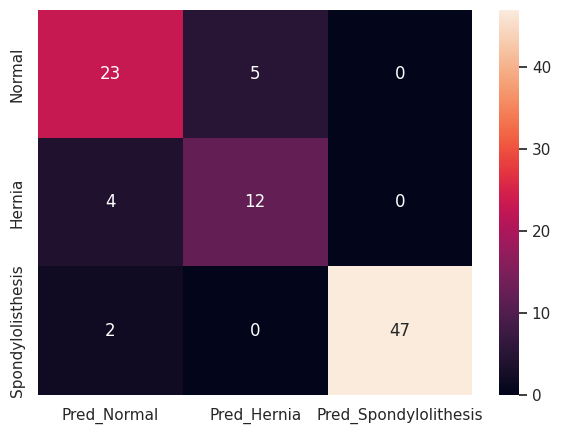

In [ ]:
# confusion matrix
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, predicted_labels,  labels = ["Normal", "Hernia", "Spondylolisthesis"])
data_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Hernia", "Spondylolisthesis"]], columns = [i for i in ["Pred_Normal", "Pred_Hernia", "Pred_Spondylolithesis"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot = True)

# **finding best model**

In [ ]:
logic = LogisticRegression(solver = 'liblinear')
KNN=KNeighborsClassifier(n_neighbors=7, weights = 'distance')
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
bag = BaggingClassifier(base_estimator = dtree, n_estimators = 50, random_state = 1)
random = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 3)
ab = AdaBoostClassifier(n_estimators = 10, random_state = 1)
grad = GradientBoostingClassifier(n_estimators = 50, random_state = 1)

In [ ]:
seed = 7
# prepare models
models = []
models.append(('LR', logic))
models.append(('KNN', KNN))
models.append(('DT', dtree))
models.append(('Bag', bag))
models.append(('RF', random))
models.append(('AB', ab))
models.append(('GB', grad))

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.829032 (0.050078)
KNN: 0.829032 (0.055966)
DT: 0.800000 (0.055499)
Bag: 0.822581 (0.041436)
RF: 0.825806 (0.043757)
AB: 0.703226 (0.089861)
GB: 0.822581 (0.043876)


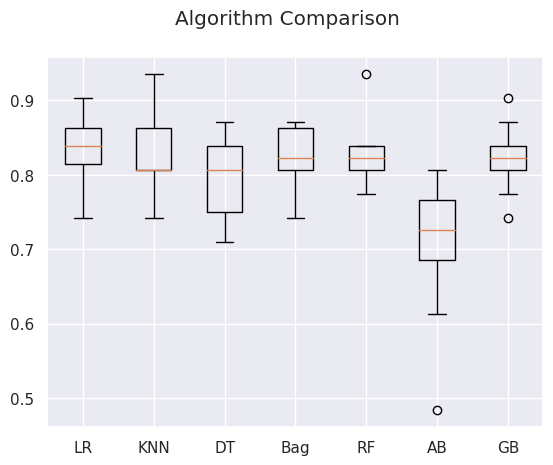

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Accuracy is more for KNN, LR, Bag, RF and GB. However the standard deviation is less for Bagging model.

We can tell Bagging be a better algorithm for this dataset because of high accuracy and less Standard deviation

# **We will check with scaled values to see whether there is improvement in model**

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  x_scaled, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.854839 (0.056336)
KNN: 0.787097 (0.043757)
DT: 0.800000 (0.055499)
Bag: 0.822581 (0.041436)
RF: 0.825806 (0.043757)
AB: 0.703226 (0.089861)
GB: 0.822581 (0.043876)


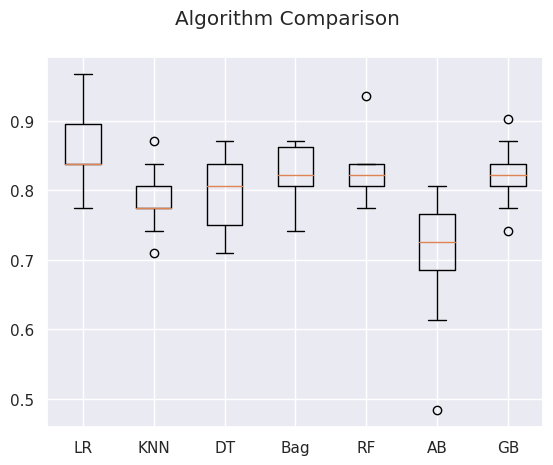

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

When the scaled values are used instead of normal values Logistic regression is performing well.

Logistic Regression gives high accuracy with little standard deviation.